# HR Analytics Project (Evaluation Project - 2)

In [1]:
# Import Some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's import the dataset

hr_data = pd.read_csv("HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of the dataset

hr_data.shape

(1470, 35)

In [4]:
# Quick information about dataset

hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This dataset has 9 object columns  in which "Attrition" is our Target Column.

In [5]:
# Let's check null values if any..

hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is not a single column that have null values

In [6]:
# there is column name Employee Number in the dataset and it is not useful. So, let's drop it

hr_data.drop(columns = ["EmployeeNumber"], axis=1, inplace=True)

In [7]:
# Let's separate the numerica column and categorical column

numerical = hr_data.drop(columns = ["Attrition","BusinessTravel","Department","EducationField","Gender",
                                   "JobRole","MaritalStatus","Over18","OverTime"],axis=1)

categorical = hr_data[["Attrition","BusinessTravel","Department","EducationField","Gender",
                                   "JobRole","MaritalStatus","Over18","OverTime"]]

In [8]:
# Categorical Columns

categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [9]:
# Let's count the value of each int64 columns

for col in hr_data.columns:
    if hr_data[col].dtype == 'int64':
        print(hr_data[col].value_counts())
        print()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

1    1470
Name: EmployeeCount,

In [10]:
# Let's count the value of each object columns

for col in hr_data.columns:
    if hr_data[col].dtype == 'object':
        print(hr_data[col].value_counts())
        print()

No     1233
Yes     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Y    1470
Name: Over18, dtype: int64

No     1054
Yes     416
Na

In [11]:
# Let's see column Over18

hr_data["Over18"].unique()

array(['Y'], dtype=object)

In [12]:
# Column Over18 has only 1 value and due to only 1, it will not helpful for the dataset, Let's drop it

hr_data.drop(columns = ["Over18"], axis=1, inplace=True)

In [13]:
# Employee Count

hr_data["EmployeeCount"].unique()

array([1], dtype=int64)

In [14]:
# Employ count has only 1 value. So, it is not useful to the dataset let's drop it

hr_data.drop(columns = ["EmployeeCount"], axis=1, inplace=True)

In [15]:
# RelationshipSatisfaction

hr_data["StandardHours"].unique()

array([80], dtype=int64)

In [16]:
# StandardHours has only 1 value. So, it is not useful to the dataset let's drop it

hr_data.drop(columns = ["StandardHours"], axis=1, inplace=True)

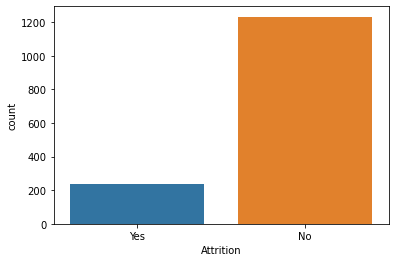

In [17]:
# Let's check the target column Attrition

sns.countplot("Attrition", data=hr_data)
plt.show()

# There is very high class imbalance issue

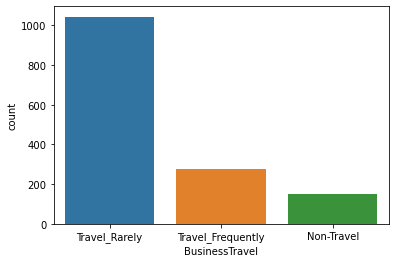

In [18]:
# Let's check the  Business Travel

sns.countplot(x="BusinessTravel",data=hr_data)
plt.show()

# Most of the employee travel rarely

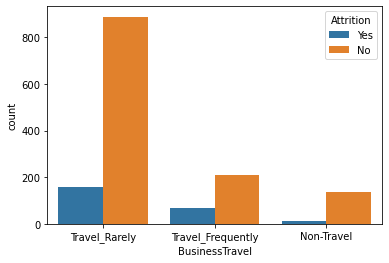

In [19]:
# Business Traves vs Attrition

sns.countplot(x="BusinessTravel", data=hr_data, hue="Attrition")
plt.show()

# rarely travel employee has only 20% attrition to yes and who travel frequently has near 35% attrition to yes
# and non travel has very low attrition to yes

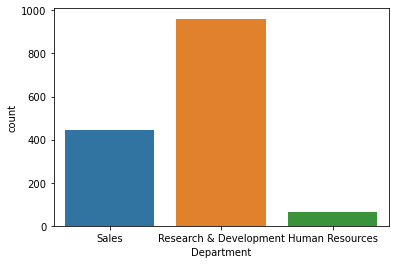

In [20]:
# Let's check department

sns.countplot(x="Department",data=hr_data)
plt.show()

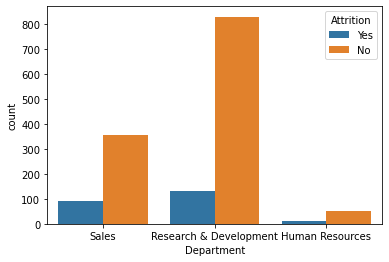

In [21]:
# Department vs Attrition

sns.countplot(x="Department", data=hr_data, hue="Attrition")
plt.show()

# Human Resources has high yes attrition than Sales and Research development

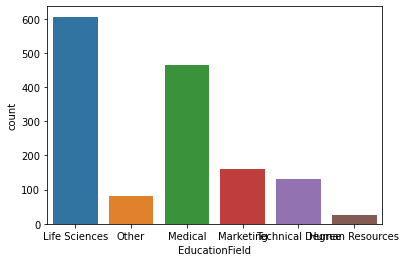

In [22]:
# Education Field

sns.countplot(x="EducationField", data=hr_data)
plt.show()

# Most of the employee are from Life Science and Medical field

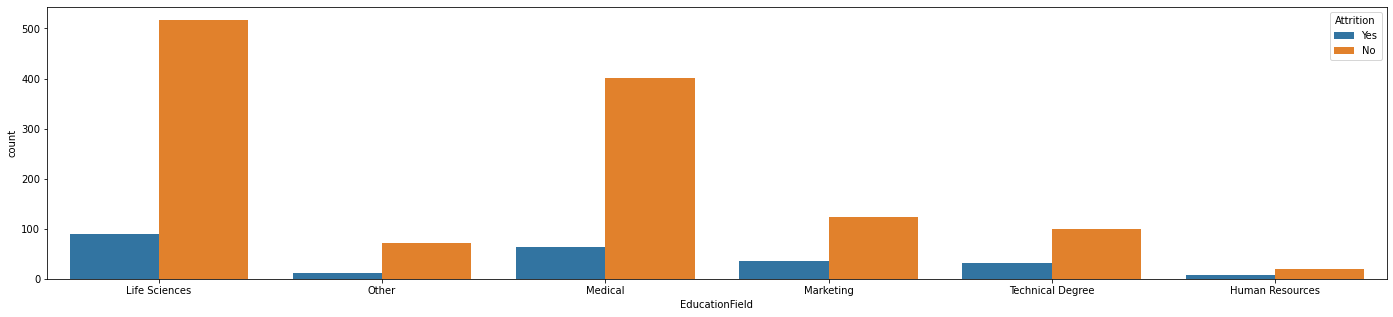

In [23]:
# Education vs Attrition

plt.figure(figsize=(24,5))
sns.countplot(x="EducationField", data=hr_data, hue="Attrition")
plt.show()

# Technical Degree and Human research employee has high % attrition to yes and Life science and Medical employee has low % to the yes

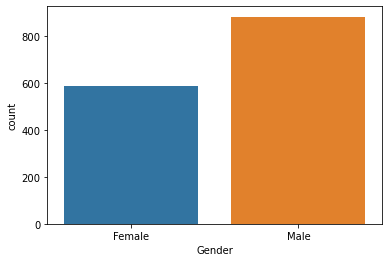

In [24]:
# Gender

sns.countplot(x="Gender", data=hr_data)
plt.show()

# male employees are more than females

<AxesSubplot:xlabel='Gender', ylabel='count'>

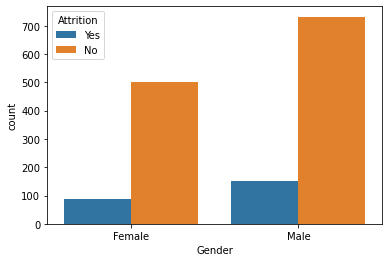

In [25]:
# Gender vs Attrition

sns.countplot(x="Gender", data= hr_data, hue="Attrition")

# Almost equal % contribution to yes attrition by male and female

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

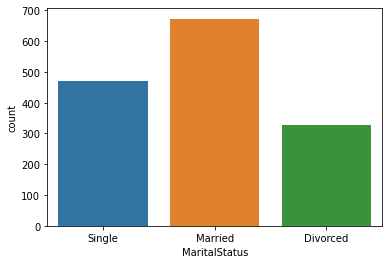

In [26]:
# Maritial Status

sns.countplot(x="MaritalStatus", data=hr_data)

# married employee are high in numbers

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

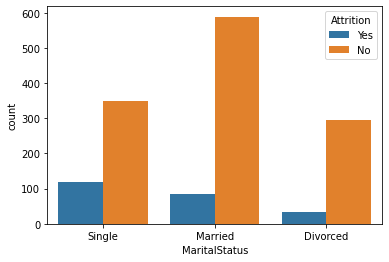

In [27]:
# Maritial Status vs Attrition

sns.countplot(x="MaritalStatus", data=hr_data, hue="Attrition")

# females are giving high in % to the yes attrition

<AxesSubplot:xlabel='OverTime', ylabel='count'>

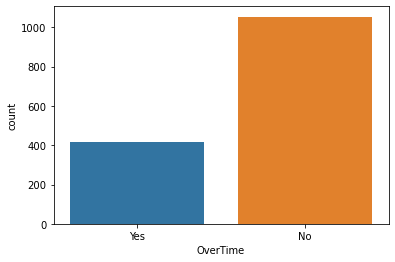

In [28]:
# OverTime

sns.countplot(x="OverTime", data=hr_data)

# the employee who are doing overtime are less

<AxesSubplot:xlabel='OverTime', ylabel='count'>

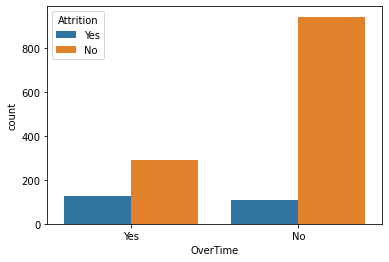

In [29]:
# OverTime vs Attrition

sns.countplot(x="OverTime", data=hr_data, hue="Attrition")

# The employee who are doing overtime are more stable than others

<AxesSubplot:xlabel='Age', ylabel='count'>

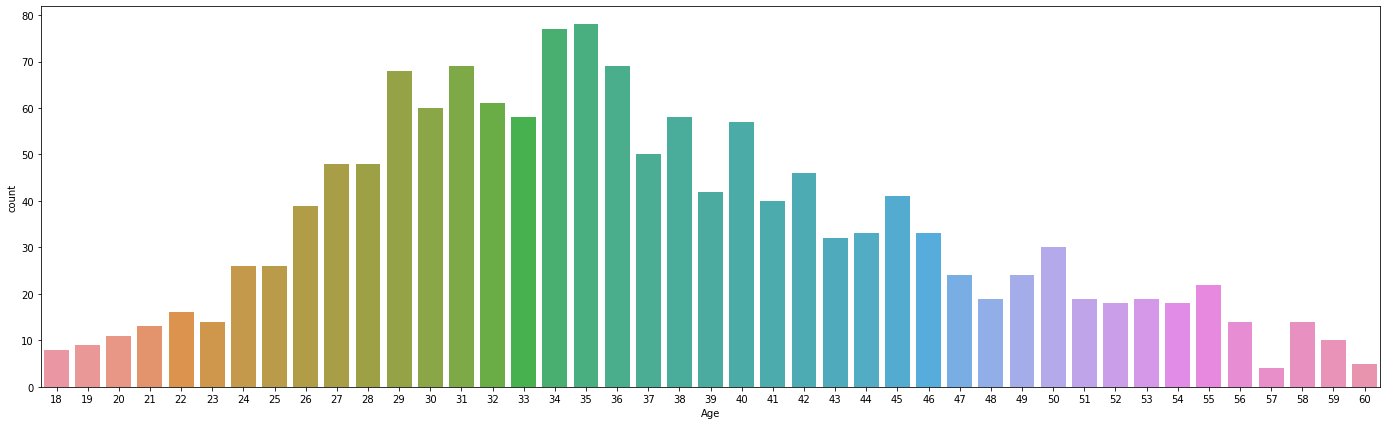

In [30]:
# Age

plt.figure(figsize=(24,7))
sns.countplot(x="Age", data=hr_data)

# most of the employee are between 15-40

<AxesSubplot:xlabel='Age', ylabel='count'>

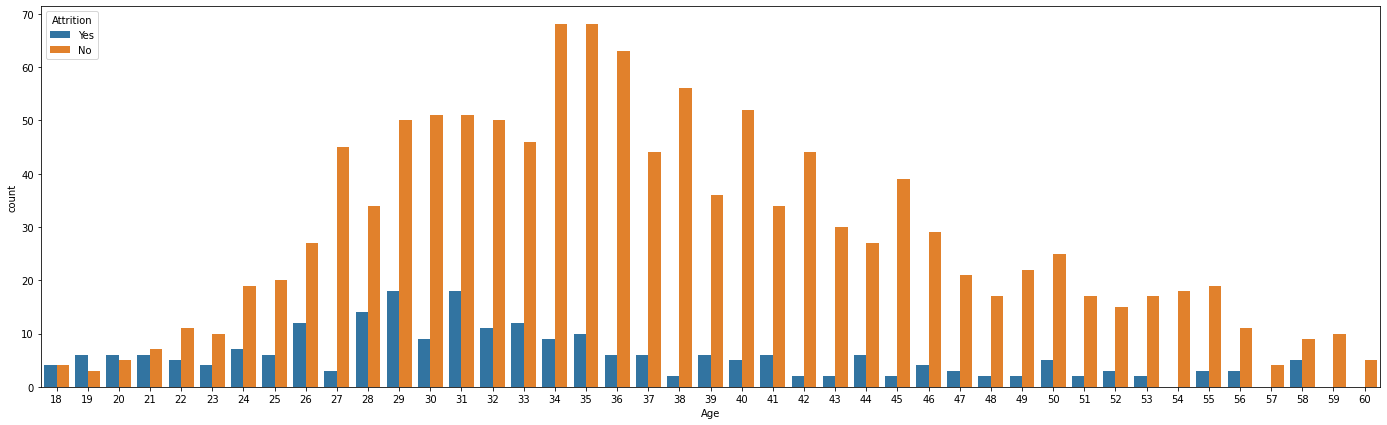

In [31]:
# Age vs Attrition

plt.figure(figsize=(24,7))
sns.countplot(x="Age", data=hr_data, hue="Attrition")

# employee less than age 29 age have higher attrition to yes

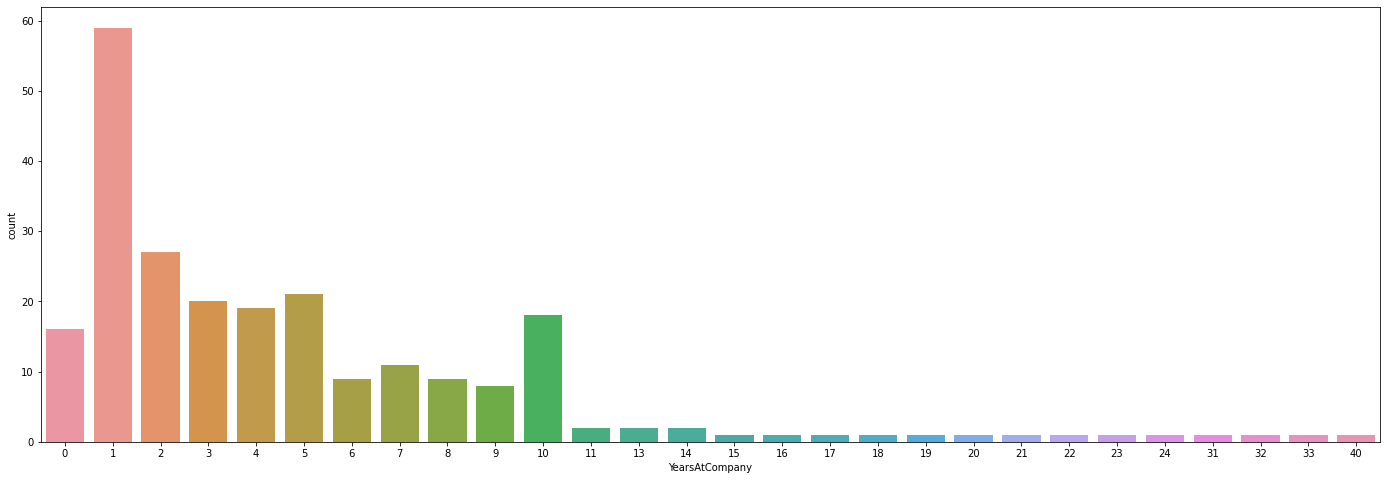

In [32]:
# years at company vs attrition

plt.figure(figsize=(24,8))
sns.countplot(x="YearsAtCompany", data=hr_data[hr_data["Attrition"]=='Yes'])
plt.show()

# employee who has only 1 years of experience are more stable than othere
# and it is very rare chance to stay an employee who has experience more than 10 yesrs

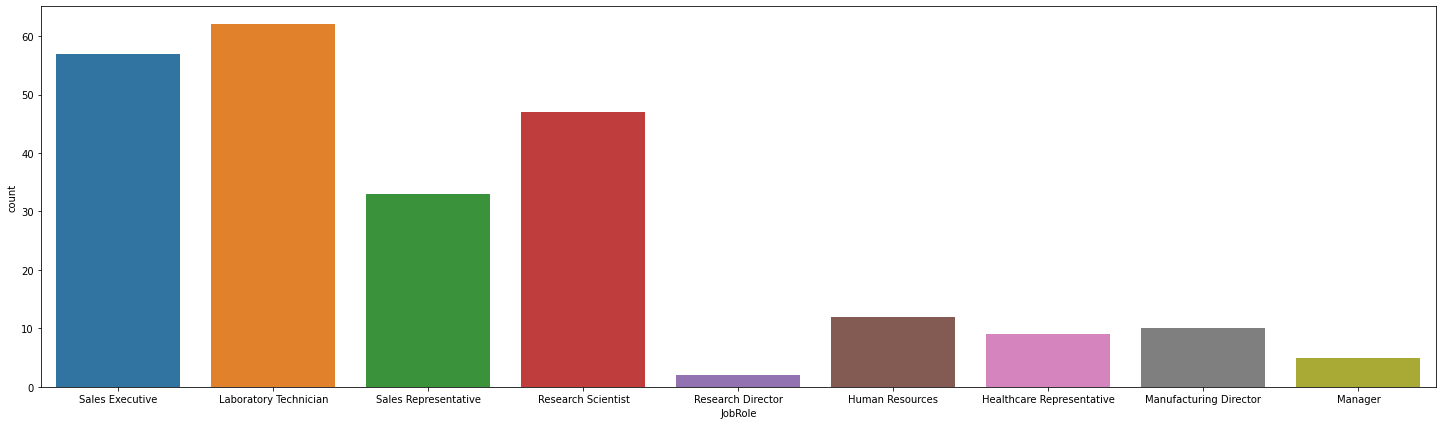

In [33]:
# Job role vs attrition

plt.figure(figsize=(25,7))
sns.countplot(x="JobRole", data=hr_data[hr_data["Attrition"]=="Yes"])
plt.show()

# Sales Executive, Laboratory Technician, Sales Representative and Research Scientist has are more stable than others

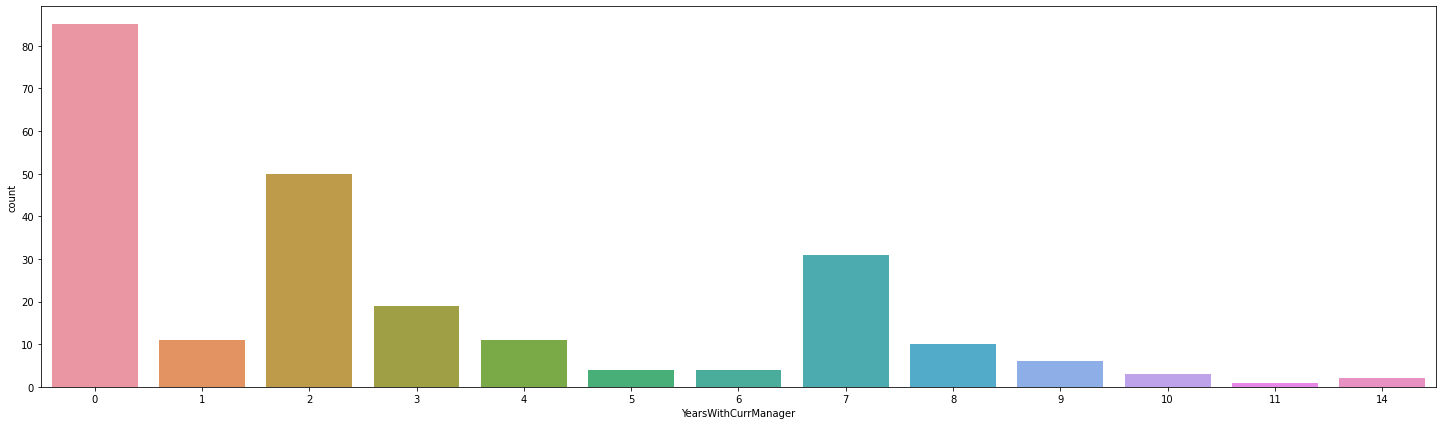

In [34]:
# YearsWithCurrManager

plt.figure(figsize=(25,7))
sns.countplot(x="YearsWithCurrManager",data=hr_data[hr_data["Attrition"]=='Yes'])
plt.show()

# who are fresher has higher attrition
# maybe if they get 2 years of experience they left the job
# so possibilities to give the chances to the fresher who stay for long time in the company

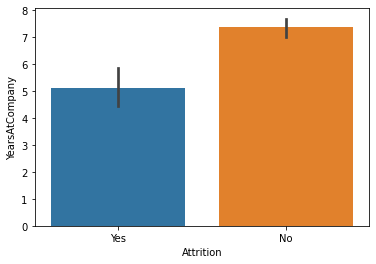

In [35]:
# Year at company vs attrition

#plt.figure(figsize=(25,8))
sns.barplot(y="YearsAtCompany", x="Attrition", data=hr_data)
plt.show()

# average numbers of employess is staying in the complany before leaving

In [36]:
# let's check the correlation matrix

corr = hr_data.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [37]:
# Let's check the skewness

print(hr_data.skew())
print("\nTotal Count of numerica features : ",len(hr_data.skew()))
print("Count of features which are significant skewed : ",len(hr_data.skew().loc[abs(hr_data.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Total Count of numerica features :  23
Count of features which are significant skewed :  14


In [38]:
# Let's remove the skewness

for index in hr_data.skew().index:
    if hr_data.skew().loc[index]>0.5:
        hr_data[index] = np.log1p(hr_data[index])
    if hr_data.skew().loc[index]<-0.5:
        hr_data[index] = np.square(hr_data[index])

In [39]:
# Let's check the skewness again

print(hr_data.skew())
print("\nTotal Count of numerica features : ",len(hr_data.skew()))
print("Count of features which are significant skewed : ",len(hr_data.skew().loc[abs(hr_data.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

Total Count of numerica features :  23
Count of features which are significant skewed :  3


In [40]:
# Let's separate the input and output

df_x = hr_data.drop(columns = ["Attrition"], axis=1)
y = hr_data["Attrition"]

In [41]:
# Let's check the how many categorical column are present in the data

print(df_x.dtypes.loc[df_x.dtypes == 'object'])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


In [42]:
# Let's convert the categorical data to numerical data

df_x = pd.get_dummies(df_x, drop_first=True)
df_x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,...,0,0,0,0,0,1,0,1,0,0


<AxesSubplot:xlabel='Attrition', ylabel='count'>

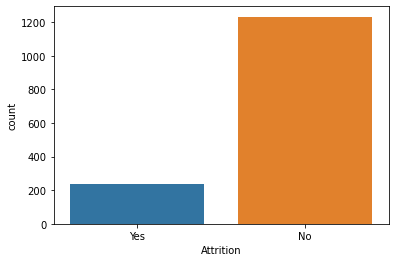

In [43]:
# Target Column Analysis

sns.countplot(y)

# As already seen that ther is class imbalance issue, Let's fix it

In [44]:
# Let's convert the target column categorical to numeric

y = y.replace({'Yes' : 1, 'No' : 0})

In [45]:
# Target value counts

y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [46]:
# Use Smote Technique for class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE()

df_x,y = sm.fit_resample(df_x,y)

y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

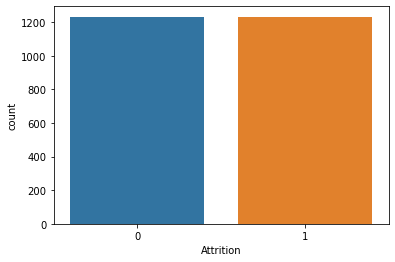

In [47]:
# Now the class im balanced

sns.countplot(y)

In [48]:
# Let's check the VIF Score

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scale = StandardScaler()
x_scale = scale.fit_transform(df_x)

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]
vif["Features"] = df_x.columns
vif

,VIF Score,Features
0,2.127196,Age
1,1.059359,DailyRate
2,1.045505,DistanceFromHome
3,1.100848,Education
4,1.115975,EnvironmentSatisfaction
5,1.036278,HourlyRate
6,1.153921,JobInvolvement
7,8.815550,JobLevel
8,1.121063,JobSatisfaction
9,8.377672,MonthlyIncome


The VIF scores of all the features is less than 10. So, Multicollinearity issue is not found.

Number of component explained 98% variance :  37


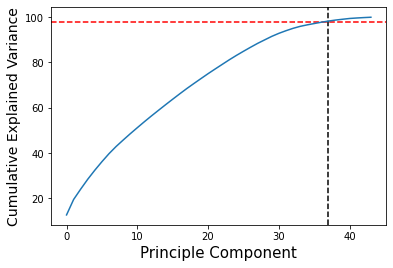

In [49]:
# Let's use PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(x_scale)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)

print("Number of component explained 98% variance : ",k)
plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

In [50]:
# Let's use PCA for scaling

pca = PCA(n_components = 37)
X = pca.fit_transform(df_x)
X

array([[ 5.14850357e+03,  3.49547043e+02, -2.82559609e+01, ...,
        -1.94459622e-01,  1.45719072e-01,  7.87165206e-02],
       [ 1.05805902e+04, -4.46114751e+02,  2.39902799e+00, ...,
         3.82353934e-01, -5.54548711e-02, -5.00088238e-02],
       [-1.19356463e+04,  5.34321237e+02, -2.43669390e+01, ...,
         1.50501151e-01,  6.29661923e-01,  3.79605501e-01],
       ...,
       [-1.09031233e+04, -3.58588617e+02,  2.58691376e+01, ...,
         4.92004236e-01, -4.56898311e-01, -1.85593082e-01],
       [ 1.84486051e+03, -1.25226748e+02,  1.43407464e+01, ...,
        -1.24244744e-01, -1.67471319e-01, -2.86734542e-02],
       [-5.32784550e+03,  5.90644832e+02, -1.42641335e+01, ...,
         7.21242676e-02,  1.04254571e-01, -9.54621916e-02]])

In [51]:
# Let's import the necessary libraries for model building

from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [52]:
# Let's find the best random state for eact best model


def bestmodel(model):
    start = time()
    max_auc = 0
    max_state =0
    for i in range(21,101):
        x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_auc:
            max_auc = score
            max_state = i
    print("Best Accuracy Score corresponding ",max_state," is",max_auc)
    print("Cross Validation Score is : ",cross_val_score(model,X,y,cv=5).mean())
    end = time()
    print("Time Taken by Model for prediction : {:.4f} seconds".format(end-start))

In [53]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
bestmodel(LR)

Best Accuracy Score corresponding  54  is 0.868421052631579
Cross Validation Score is :  0.7875536868384099
Time Taken by Model for prediction : 6.5855 seconds


In [54]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Accuracy Score corresponding  51  is 0.840080971659919
Cross Validation Score is :  0.7689326686978015
Time Taken by Model for prediction : 9.7712 seconds


In [55]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Accuracy Score corresponding  26  is 0.7631578947368421
Cross Validation Score is :  0.7161384894597236
Time Taken by Model for prediction : 6.1289 seconds


In [56]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
bestmodel(RFC)

Best Accuracy Score corresponding  36  is 0.9412955465587044
Cross Validation Score is :  0.8869870494616945
Time Taken by Model for prediction : 112.0500 seconds


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 36)

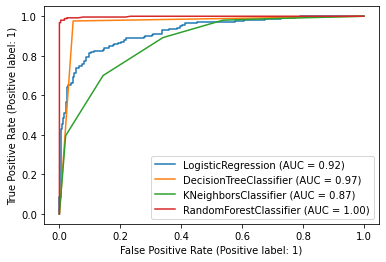

In [58]:
# Let's plot ROC AUC curve

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

#### By checking the accuracy scores & ROC AUC curver, It is clear that Random Forest Classifier is giving the best score. So, let's  try to increase the accuracy score using Hyperparameter Tuning with Random Forest Classifier.

In [59]:
# Hyperparameter Tuning with Random Forest Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200], "criterion" : ["gini", "entropy"],
             "min_samples_split" : [2,3], "min_samples_leaf" : [1,2]}

grid_search = GridSearchCV(RFC,param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [68]:
# Final Model

Final_HR_Model = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=3, n_estimators=200)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 36)
Final_HR_Model.fit(x_train, y_train)
y_preds = Final_HR_Model.predict(x_test)
accuracy_score(y_test,y_preds)

0.9412955465587044

In [69]:
# Saving the Final Model

import joblib

joblib.dump(Final_HR_Model,"Final_HR_Model.pkl")

['Final_HR_Model.pkl']